## <b> <span style='color:blue'>|</span> 🧠 Brain Tumor Detection With YOLOv8 </b> <hr>

- To develop an AI system that automatically detects and classifies brain tumors (glioma, meningioma, pituitary) in MRI scans with high accuracy using YOLOv8 object detection.

### **Key Features**  
- **Real-time detection:** Processes MRI scans in a single pass  
- **Multi-class classification:** Identifies 3 tumor types  
- **High precision:** Achieved 92.1% mAP50 on validation data  
- **Clinical application:** Aids radiologists in early diagnosis

![Prediction Image](./runs/detect/train/val_batch0_labels.jpg)


## <b>1 <span style='color:red'>|</span>  Installing Required Libraries </b> 

In [1]:
# Install Essential Libraries
! pip install ultralytics

## <b>2 <span style='color:red'>|</span>  Importing Essential Libraries </b> 

In [1]:
# Import Essential Libraries
import os
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## <b>3 <span style='color:red'>|</span> Loading Pre-trained YOLOv8 Model </b> 

• A pre-trained YOLOv8 model (yolov8n.pt) is loaded and fine-tuned on a custom brain tumor dataset.

In [3]:
# Load a pretrained YOLOv8n model from Ultralytics
Model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:02<00:00, 2.71MB/s]


## <b>4 <span style='color:red'>|</span> Training Configuration</b> 

- Defines the path to the dataset configuration file (data.yaml) which contains paths to training/validation data and class labels.

- **Starts Training With:** 
    - **Epochs:** **70 Epochs** Runs the training process for 70 complete passes over the entire dataset. 
    - **Optimizer:** **AdamW** Uses the AdamW optimization algorithm, which helps in better generalization by decoupling weight decay from the gradient update.
    - **Learning Rate:** Sets the step size for updating model weights during training to **0.001**.  
    - **Batch Size:** Automatically chooses the largest batch size that fits in GPU memory.
    - **Early stopping:** Stops training if validation performance doesn’t improve for **15 consecutive epochs**.
  

In [4]:
# Define the dataset_path
data_yaml_path = r"D:\Projects\Brain Tumor\YOLOV8\data.yaml"

# Train the model on our custom dataset
results = Model.train( data= data_yaml_path , epochs=70 , patience=15 , batch= -1 , optimizer='AdamW', lr0=0.001 )

New https://pypi.org/project/ultralytics/8.3.110 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.58  Python-3.12.8 torch-2.5.1+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\Projects\Brain Tumor\YOLOV8\data.yaml, epochs=70, time=None, patience=15, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

train: Scanning D:\Projects\Brain Tumor\YOLOV8\train\labels... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:01<00:00, 1979.97it/s]


train: New cache created: D:\Projects\Brain Tumor\YOLOV8\train\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch:   intended for CUDA devices, using default batch-size 16


train: Scanning D:\Projects\Brain Tumor\YOLOV8\train\labels.cache... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning D:\Projects\Brain Tumor\YOLOV8\valid\labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<00:00, 2150.35it/s]

val: New cache created: D:\Projects\Brain Tumor\YOLOV8\valid\labels.cache
Plotting labels to runs\detect\train\labels.jpg... 


optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70         0G      1.364      2.749      1.465         21        640: 100%|██████████| 134/134 [10:15<00:00,  4.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:07<00:00,  3.39s/it]

                   all        612        612      0.233       0.52      0.354      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70         0G        1.3      1.874      1.403         25        640: 100%|██████████| 134/134 [11:04<00:00,  4.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:09<00:00,  3.49s/it]

                   all        612        612      0.537      0.449      0.452      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70         0G      1.291      1.727      1.396         27        640: 100%|██████████| 134/134 [11:20<00:00,  5.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.18s/it]

                   all        612        612      0.522      0.583      0.532      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70         0G      1.279      1.641       1.39         24        640: 100%|██████████| 134/134 [10:05<00:00,  4.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:08<00:00,  3.45s/it]

                   all        612        612      0.538      0.513      0.517      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70         0G      1.265      1.553      1.376         22        640: 100%|██████████| 134/134 [10:22<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:57<00:00,  2.87s/it]

                   all        612        612      0.678      0.588      0.645      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70         0G      1.224      1.475      1.355         26        640: 100%|██████████| 134/134 [09:23<00:00,  4.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:02<00:00,  3.11s/it]

                   all        612        612      0.684      0.596      0.651      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70         0G      1.198      1.384       1.33         15        640: 100%|██████████| 134/134 [09:42<00:00,  4.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:06<00:00,  3.31s/it]

                   all        612        612      0.766      0.676      0.769      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70         0G      1.177      1.355      1.318         25        640: 100%|██████████| 134/134 [09:42<00:00,  4.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:02<00:00,  3.14s/it]

                   all        612        612      0.786      0.707      0.794      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70         0G      1.163      1.324      1.308         22        640: 100%|██████████| 134/134 [10:11<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.23s/it]

                   all        612        612      0.751      0.761      0.798       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70         0G      1.148      1.247      1.289         25        640: 100%|██████████| 134/134 [10:40<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:06<00:00,  3.35s/it]

                   all        612        612      0.759      0.702      0.764      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70         0G      1.128      1.233      1.285         26        640: 100%|██████████| 134/134 [10:58<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:20<00:00,  4.01s/it]

                   all        612        612      0.814      0.724      0.787      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70         0G      1.129      1.201      1.281         29        640: 100%|██████████| 134/134 [10:29<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:05<00:00,  3.26s/it]

                   all        612        612      0.792      0.762      0.828      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70         0G      1.122      1.164      1.274         34        640: 100%|██████████| 134/134 [10:03<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:02<00:00,  3.14s/it]

                   all        612        612      0.793      0.793      0.821      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70         0G      1.102      1.162      1.265         28        640: 100%|██████████| 134/134 [10:10<00:00,  4.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.20s/it]

                   all        612        612      0.772      0.785       0.83      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70         0G      1.092      1.111      1.259         28        640: 100%|██████████| 134/134 [10:17<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.22s/it]

                   all        612        612      0.829      0.771      0.841      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70         0G      1.065      1.096      1.237         20        640: 100%|██████████| 134/134 [10:29<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.20s/it]

                   all        612        612       0.79      0.737      0.785      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70         0G      1.046      1.028      1.221         34        640: 100%|██████████| 134/134 [10:25<00:00,  4.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.19s/it]

                   all        612        612      0.804      0.784       0.84      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70         0G      1.062      1.067      1.235         32        640: 100%|██████████| 134/134 [10:33<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:05<00:00,  3.30s/it]

                   all        612        612      0.812       0.75      0.832      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70         0G      1.046      1.003      1.229         24        640: 100%|██████████| 134/134 [10:54<00:00,  4.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:06<00:00,  3.33s/it]

                   all        612        612      0.796        0.8      0.839      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70         0G      1.042      1.001      1.225         18        640: 100%|██████████| 134/134 [11:00<00:00,  4.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:06<00:00,  3.32s/it]

                   all        612        612      0.857      0.754      0.841       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70         0G      1.038      1.019      1.219         29        640: 100%|██████████| 134/134 [10:57<00:00,  4.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:06<00:00,  3.31s/it]

                   all        612        612      0.857      0.768      0.857      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70         0G       1.01     0.9502      1.219         26        640: 100%|██████████| 134/134 [10:54<00:00,  4.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:06<00:00,  3.34s/it]

                   all        612        612      0.835      0.809      0.861      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70         0G      1.021      0.922      1.202         20        640: 100%|██████████| 134/134 [10:30<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.19s/it]

                   all        612        612      0.787      0.827      0.856      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70         0G      1.014     0.9086      1.191         25        640: 100%|██████████| 134/134 [10:45<00:00,  4.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:06<00:00,  3.32s/it]

                   all        612        612      0.809      0.833       0.86      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70         0G      1.014      0.931      1.203         24        640: 100%|██████████| 134/134 [10:56<00:00,  4.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:06<00:00,  3.35s/it]

                   all        612        612      0.818       0.82      0.863      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70         0G     0.9815     0.8785      1.181         17        640: 100%|██████████| 134/134 [10:41<00:00,  4.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:00<00:00,  3.05s/it]

                   all        612        612      0.851      0.817      0.872      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70         0G     0.9985     0.8875      1.203         35        640: 100%|██████████| 134/134 [11:01<00:00,  4.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:13<00:00,  3.69s/it]

                   all        612        612      0.839       0.82      0.874      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70         0G     0.9608     0.8637      1.174         25        640: 100%|██████████| 134/134 [11:50<00:00,  5.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:09<00:00,  3.47s/it]

                   all        612        612      0.865      0.817      0.878      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70         0G     0.9614     0.8321      1.169         24        640: 100%|██████████| 134/134 [11:39<00:00,  5.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:07<00:00,  3.40s/it]

                   all        612        612      0.863      0.823       0.88      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70         0G     0.9423     0.8207      1.164         25        640: 100%|██████████| 134/134 [10:25<00:00,  4.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:59<00:00,  2.96s/it]

                   all        612        612      0.822      0.841      0.875      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70         0G     0.9422     0.8307      1.156         19        640: 100%|██████████| 134/134 [09:45<00:00,  4.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.20s/it]

                   all        612        612      0.867      0.818      0.872      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70         0G     0.9357     0.8089      1.151         24        640: 100%|██████████| 134/134 [10:33<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.21s/it]

                   all        612        612      0.881      0.807      0.873      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70         0G     0.9511     0.8058      1.167         21        640: 100%|██████████| 134/134 [10:30<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:06<00:00,  3.30s/it]

                   all        612        612      0.906      0.818      0.897      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70         0G     0.9238     0.8127      1.151         26        640: 100%|██████████| 134/134 [10:30<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.20s/it]

                   all        612        612      0.878      0.825      0.895      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70         0G     0.9251     0.7852      1.149         25        640: 100%|██████████| 134/134 [10:39<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.21s/it]

                   all        612        612      0.857      0.846       0.89      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70         0G     0.8993     0.7539      1.133         28        640: 100%|██████████| 134/134 [10:33<00:00,  4.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.21s/it]

                   all        612        612      0.871       0.81      0.883      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70         0G     0.9277     0.7615      1.154         30        640: 100%|██████████| 134/134 [10:29<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.19s/it]

                   all        612        612      0.891       0.82      0.895      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70         0G     0.9047     0.7381      1.136         19        640: 100%|██████████| 134/134 [10:28<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.20s/it]

                   all        612        612      0.883      0.839      0.901      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70         0G     0.8986     0.7471      1.137         26        640: 100%|██████████| 134/134 [10:27<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.18s/it]

                   all        612        612       0.89      0.844      0.906      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70         0G     0.8986     0.7174      1.129         28        640: 100%|██████████| 134/134 [10:28<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.19s/it]

                   all        612        612      0.886       0.84      0.903      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70         0G     0.8805     0.7076      1.126         29        640: 100%|██████████| 134/134 [10:31<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.19s/it]

                   all        612        612      0.861      0.861      0.895      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70         0G     0.8864     0.6964      1.122         25        640: 100%|██████████| 134/134 [10:32<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.20s/it]

                   all        612        612      0.877      0.865      0.915      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70         0G     0.8692     0.6877      1.109         26        640: 100%|██████████| 134/134 [10:29<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.20s/it]

                   all        612        612       0.85      0.848      0.906      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70         0G     0.8911     0.7081       1.12         26        640: 100%|██████████| 134/134 [10:27<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.20s/it]

                   all        612        612      0.906      0.802      0.896      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70         0G     0.8704     0.7103      1.115         24        640: 100%|██████████| 134/134 [10:27<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.18s/it]

                   all        612        612      0.891      0.835      0.904      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70         0G     0.8535     0.6577      1.097         23        640: 100%|██████████| 134/134 [10:30<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.21s/it]

                   all        612        612      0.901      0.836      0.908      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70         0G     0.8616     0.6772      1.103         38        640: 100%|██████████| 134/134 [10:29<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.23s/it]

                   all        612        612      0.887      0.832      0.911      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70         0G     0.8465     0.6622       1.11         26        640: 100%|██████████| 134/134 [10:28<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.18s/it]

                   all        612        612      0.883      0.851      0.901      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70         0G     0.8236     0.6387      1.089         20        640: 100%|██████████| 134/134 [10:28<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.18s/it]

                   all        612        612      0.899      0.854      0.911      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70         0G     0.8239     0.6305      1.079         22        640: 100%|██████████| 134/134 [10:28<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.19s/it]

                   all        612        612      0.885      0.852      0.911      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70         0G     0.8315     0.6315      1.096         27        640: 100%|██████████| 134/134 [10:32<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.21s/it]

                   all        612        612      0.892      0.865      0.918      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70         0G     0.8063     0.6245      1.074         28        640: 100%|██████████| 134/134 [10:29<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.20s/it]

                   all        612        612      0.878      0.863      0.916      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70         0G     0.8027     0.5968      1.074         27        640: 100%|██████████| 134/134 [10:29<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.20s/it]

                   all        612        612      0.926      0.827      0.912      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70         0G     0.8033     0.5898      1.067         32        640: 100%|██████████| 134/134 [10:28<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.19s/it]

                   all        612        612      0.881      0.858      0.915      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70         0G     0.7863     0.5925       1.06         28        640: 100%|██████████| 134/134 [10:30<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.19s/it]

                   all        612        612      0.913      0.848      0.918      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70         0G     0.7999     0.5886      1.067         24        640: 100%|██████████| 134/134 [10:28<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.20s/it]

                   all        612        612      0.908      0.843      0.911      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70         0G     0.7976      0.599      1.068         17        640: 100%|██████████| 134/134 [10:31<00:00,  4.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.18s/it]

                   all        612        612      0.905      0.851      0.915      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70         0G      0.772     0.5718      1.052         26        640: 100%|██████████| 134/134 [10:31<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.19s/it]

                   all        612        612      0.891      0.862      0.915      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70         0G     0.7806     0.5734      1.059         26        640: 100%|██████████| 134/134 [10:30<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.21s/it]

                   all        612        612       0.92      0.842      0.913      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70         0G     0.7638     0.5534      1.051         27        640: 100%|██████████| 134/134 [10:28<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:09<00:00,  3.46s/it]

                   all        612        612      0.898      0.857      0.914      0.695


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70         0G     0.6942     0.4913     0.9976         16        640: 100%|██████████| 134/134 [10:41<00:00,  4.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.22s/it]

                   all        612        612      0.864      0.877      0.911      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70         0G     0.6559     0.4273     0.9773         16        640: 100%|██████████| 134/134 [10:45<00:00,  4.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:07<00:00,  3.38s/it]

                   all        612        612       0.89      0.862       0.92      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70         0G     0.6488     0.4045     0.9791         16        640: 100%|██████████| 134/134 [10:22<00:00,  4.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.20s/it]

                   all        612        612        0.9      0.863      0.918      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70         0G     0.6314     0.3984     0.9632         16        640: 100%|██████████| 134/134 [10:20<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.21s/it]

                   all        612        612      0.911      0.861      0.918      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70         0G     0.6351     0.3884     0.9704         16        640: 100%|██████████| 134/134 [10:27<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:03<00:00,  3.20s/it]

                   all        612        612      0.904      0.871      0.917      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70         0G     0.6228     0.3805      0.966         16        640: 100%|██████████| 134/134 [10:20<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.21s/it]

                   all        612        612      0.909      0.855      0.917      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70         0G     0.6131     0.3738     0.9519         15        640: 100%|██████████| 134/134 [10:22<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.20s/it]

                   all        612        612      0.899      0.857      0.917      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70         0G     0.6179      0.366     0.9538         16        640: 100%|██████████| 134/134 [10:18<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.21s/it]

                   all        612        612      0.898      0.869      0.918      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70         0G     0.6162     0.3677      0.951         16        640: 100%|██████████| 134/134 [10:21<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.21s/it]

                   all        612        612      0.913       0.86      0.918      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70         0G     0.5988     0.3617     0.9433         16        640: 100%|██████████| 134/134 [10:22<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [01:04<00:00,  3.21s/it]

                   all        612        612      0.888      0.882      0.921       0.71



70 epochs completed in 13.552 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.3MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.58  Python-3.12.8 torch-2.5.1+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:54<00:00,  2.73s/it]


                   all        612        612      0.887      0.884      0.921      0.709
                glioma        285        285      0.811      0.783      0.834      0.552
            meningioma        142        142      0.951      0.949      0.977      0.828
             pituitary        185        185      0.899      0.919      0.953      0.747
Speed: 1.8ms preprocess, 79.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train


## <b>5 <span style='color:red'>|</span> Loading Best Model & Validation</b> 

- Loads the best model weights (best.pt) saved during training.

- Validates the model on the validation set and computes metrics (precision, recall, mAP).

In [3]:
# Define the path to the directory
post_training_files_path = r"D:\Projects\Brain Tumor\YOLOV8\runs\detect\train"

# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, r"D:\Projects\Brain Tumor\YOLOV8\runs\detect\train\weights\best.pt")

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics 8.3.58  Python-3.12.8 torch-2.5.1+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\Projects\Brain Tumor\YOLOV8\valid\labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [01:03<00:00,  1.63s/it]


                   all        612        612      0.887      0.884      0.921      0.709
                glioma        285        285      0.811      0.783      0.834      0.552
            meningioma        142        142      0.951      0.949      0.977      0.828
             pituitary        185        185      0.899      0.919      0.953      0.747
Speed: 1.5ms preprocess, 83.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\val


## <b>6 <span style='color:red'>|</span> Visualization Results </b> 

- **Plots key evaluation curves:**

    - **F1-Score (FL_curve):** Balance between precision/recall.

    - **Precision-Recall (PR_curve):** Trade-off between P and R.

    - **Confusion Matrix:** Normalized classification performance per class.

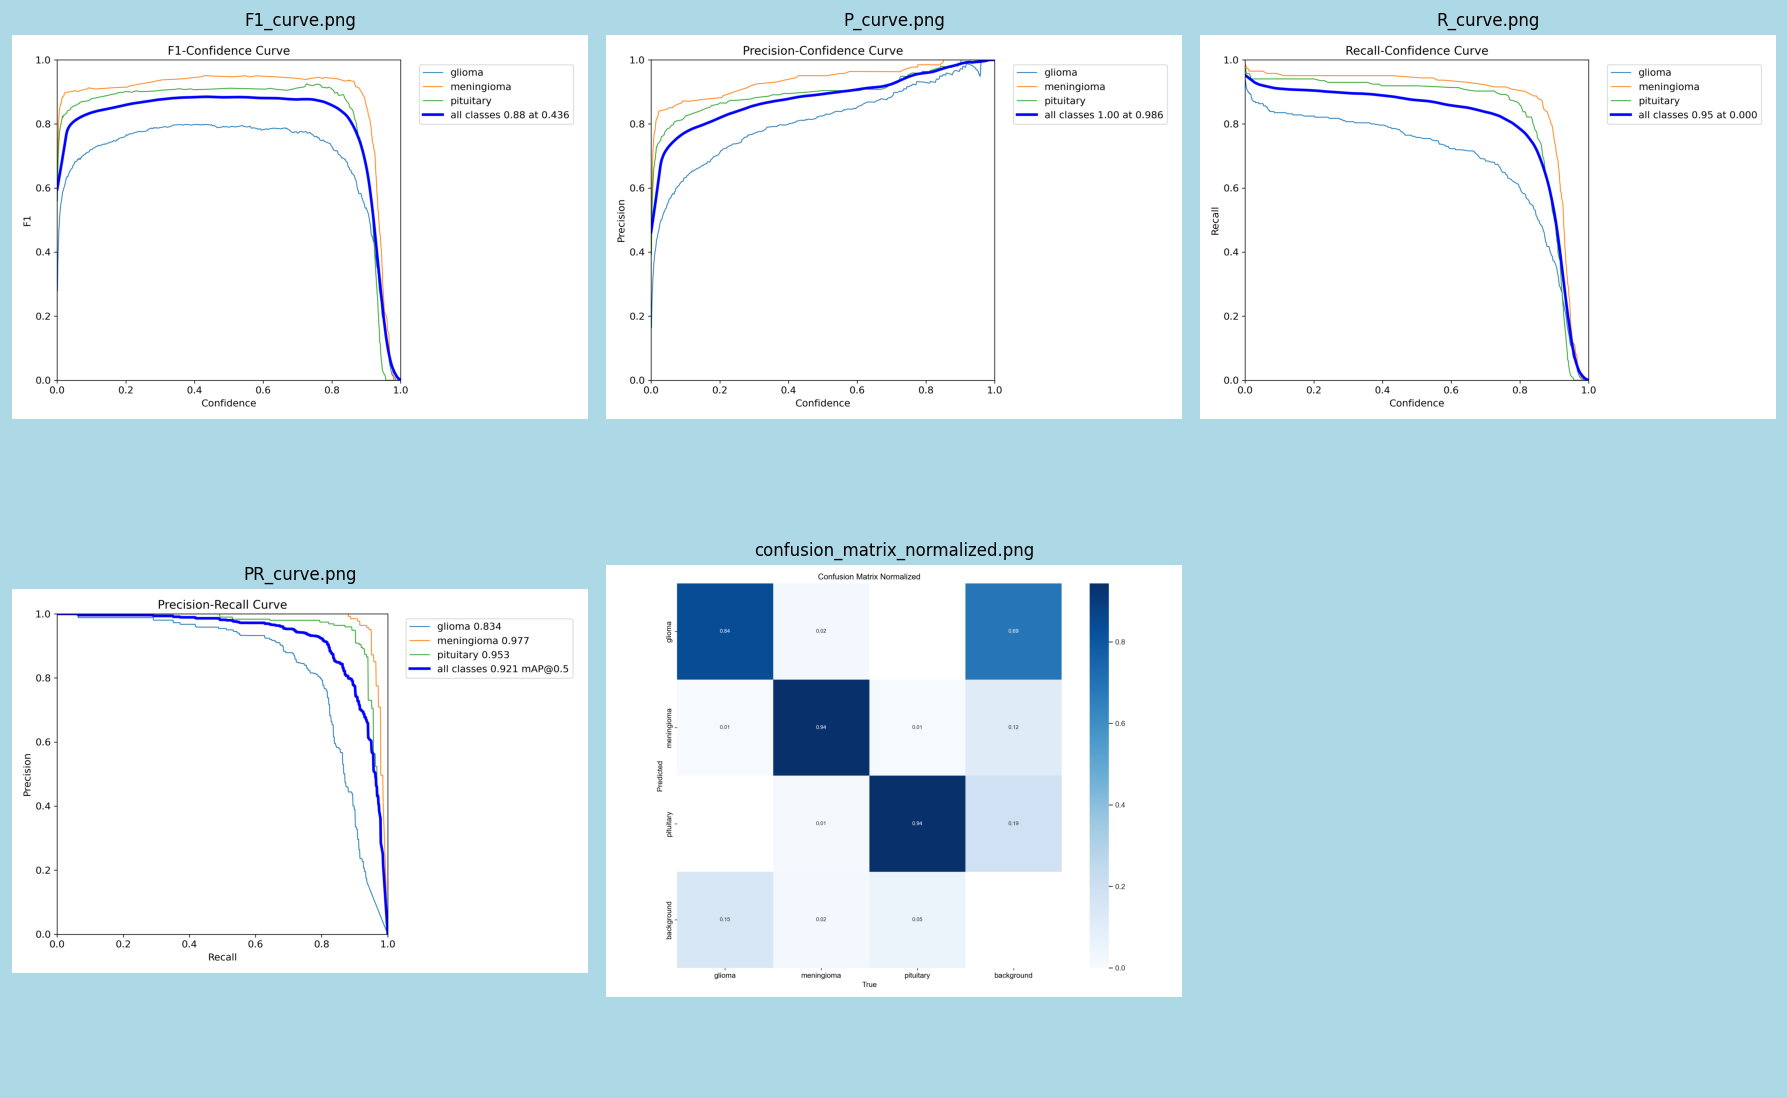

In [2]:
def display_images_in_frame_with_background(post_training_files_path, image_files, background_color='lightgray'):
    # Calculate grid size (rows and columns)
    num_images = len(image_files)
    cols = 3  # Number of columns (you can adjust this as needed)
    rows = (num_images + cols - 1) // cols  # Calculate the number of rows needed
    
    # Set up the subplot grid
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), dpi=120)
    fig.patch.set_facecolor(background_color)  # Set the figure background color
    axes = axes.flatten()  # Flatten to easily index
    
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axes[i].imshow(img)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_file, fontsize=10, color='black')  # Add title with black text
    
    # Turn off unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# List of image files to display
image_files = [
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'confusion_matrix_normalized.png',

]

# Path to the directory containing the images
post_training_files_path = r"D:\Projects\Brain Tumor\YOLOV8\runs\detect\train"

# Display the images with a background color
display_images_in_frame_with_background(post_training_files_path, image_files, background_color='lightblue')
